# Stock Market Analysis
## Mihir Garg 

In [1]:
#Importing Libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data 
from pandas_datareader import data

# For time stamps
from datetime import datetime

# Resize the size of plots
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

### Basic Stock Market Analysis

In [2]:
# The stocks for analysis
stocks=['AAPL','GOOG','MSFT','AMZN']

In [3]:
# End and Start times for data grab
end_date=datetime.now()
start_date=datetime(end_date.year-1,end_date.month,end_date.day)

In [4]:
# For grabing yahoo finance data 
for stock in stocks:
    globals()[stock]=data.get_data_yahoo(stock,start_date,end_date)

In [5]:
# View Apple stock
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-27,116.519997,117.800003,116.489998,117.260002,115.404190,18296900
2016-12-28,117.519997,118.019997,116.199997,116.760002,114.912109,20905900
2016-12-29,116.449997,117.110001,116.400002,116.730003,114.882584,15039500
2016-12-30,116.650002,117.199997,115.430000,115.820000,113.986984,30586300
2017-01-03,115.800003,116.330002,114.760002,116.150002,114.311760,28781900


In [6]:
# View Google stock
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-27,790.679993,797.859985,787.656982,791.549988,791.549988,789100
2016-12-28,793.700012,794.229980,783.200012,785.049988,785.049988,1153800
2016-12-29,783.330017,785.929993,778.919983,782.789978,782.789978,742200
2016-12-30,782.750000,782.780029,770.409973,771.820007,771.820007,1770000
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300


In [7]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,149.671389,150.634246,148.716306,149.776389,148.710589,2.705456e+07
std,15.138441,15.228178,14.866729,15.030966,15.576808,1.129193e+07
min,115.800003,116.330002,114.760002,115.820000,113.986984,1.402670e+07
25%,141.462498,142.029995,140.570000,141.364998,139.730885,2.033058e+07
50%,151.519996,153.334999,149.924995,151.455001,150.481575,2.424515e+07
75%,159.297496,160.477501,158.134998,159.677494,158.931526,2.973205e+07
max,175.110001,177.199997,174.860001,176.419998,176.419998,1.119850e+08


In [8]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-12-27 to 2017-12-26
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


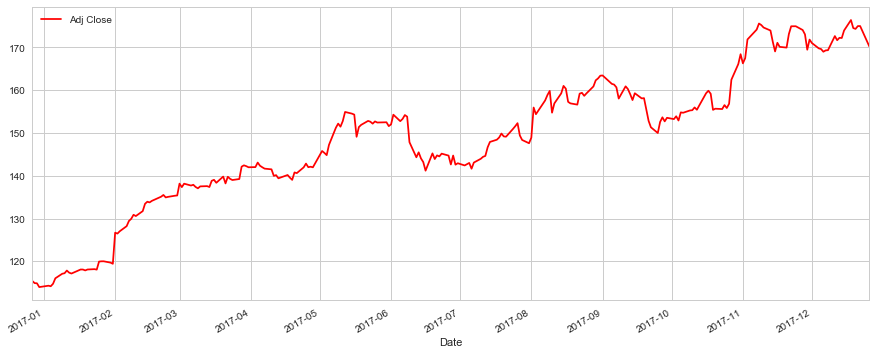

In [9]:
# Historical view for closing price
AAPL['Adj Close'].plot(legend=True,figsize=(15,6),color='red')

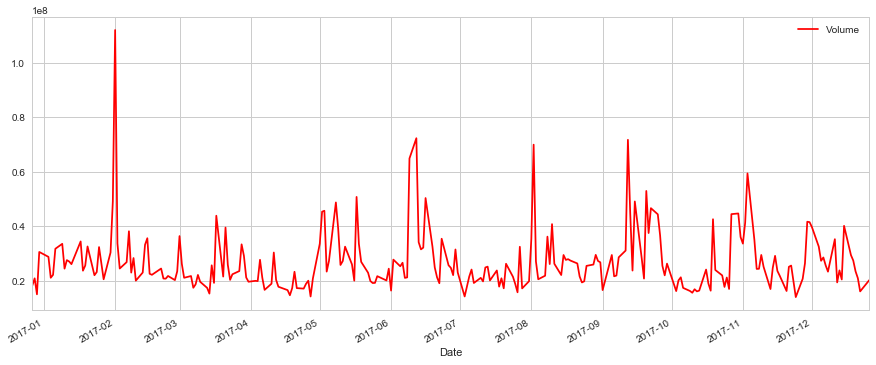

In [10]:
# Total volume of stock being traded each day over the past year
AAPL['Volume'].plot(legend=True,figsize=(15,6),color='red')

In [11]:
# Calculate Moving Average
moving_average=[10,20,50] # 10 day, 20 day, 50 day moving average

for ma in moving_average:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)


C:\Users\mihir_garg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\Users\mihir_garg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\mihir_garg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  


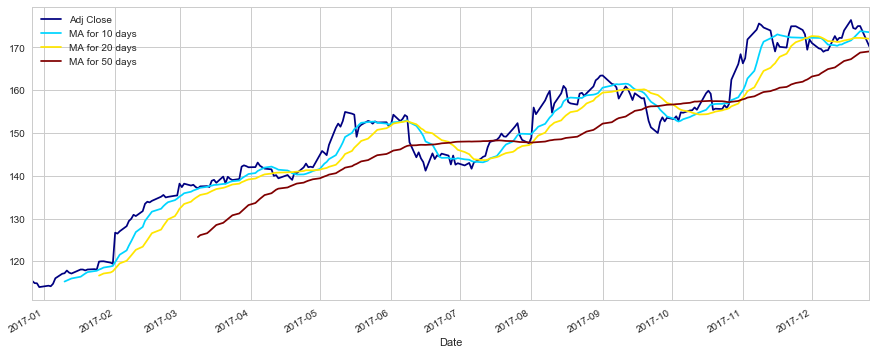

In [12]:
# Plot of all moving average
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(15,6),colormap='jet')

### Daily Return Analysis

In [13]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [14]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2016-12-27,116.519997,117.800003,116.489998,117.260002,115.404190,18296900,NaN,NaN,NaN,NaN
2016-12-28,117.519997,118.019997,116.199997,116.760002,114.912109,20905900,NaN,NaN,NaN,-0.004264
2016-12-29,116.449997,117.110001,116.400002,116.730003,114.882584,15039500,NaN,NaN,NaN,-0.000257
2016-12-30,116.650002,117.199997,115.430000,115.820000,113.986984,30586300,NaN,NaN,NaN,-0.007796
2017-01-03,115.800003,116.330002,114.760002,116.150002,114.311760,28781900,NaN,NaN,NaN,0.002849


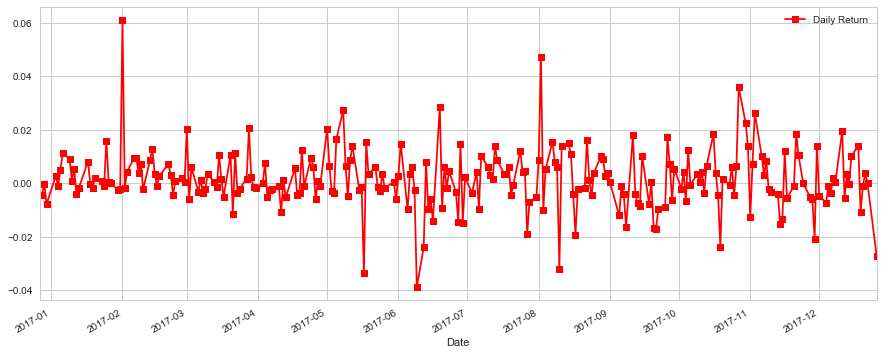

In [15]:
# Plot daily return
AAPL['Daily Return'].plot(figsize=(15,6),marker='s',color='red',legend=True)

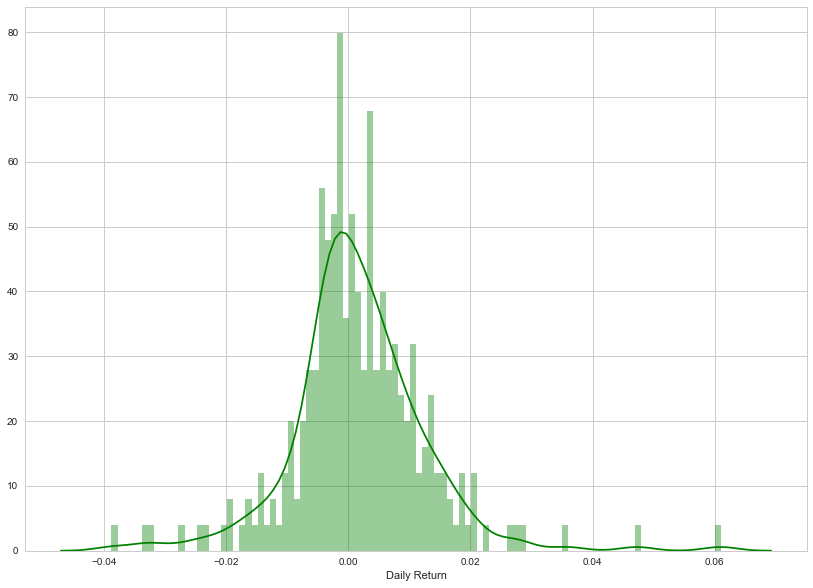

In [16]:
# Histogram of average daily return
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='green')

In [17]:
# Analyze all the stocks in list
closing = data.get_data_yahoo(stocks,start_date,end_date)['Adj Close']

In [18]:
closing.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-26,170.279007,1174.349976,1055.719971,85.379799
2017-12-22,175.009995,1168.359985,1060.119995,85.510002
2017-12-21,175.009995,1174.760010,1063.630005,85.500000
2017-12-20,174.350006,1177.619995,1064.949951,85.519997
2017-12-19,174.539993,1187.380005,1070.680054,85.830002


In [19]:
# Daily return of all stocks
stocks_return=closing.pct_change()
stocks_return.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-26,NaN,NaN,NaN,NaN
2017-12-22,0.027784,-0.005101,0.004168,0.001525
2017-12-21,0.000000,0.005478,0.003311,-0.000117
2017-12-20,-0.003771,0.002435,0.001241,0.000234
2017-12-19,0.001090,0.008288,0.005381,0.003625


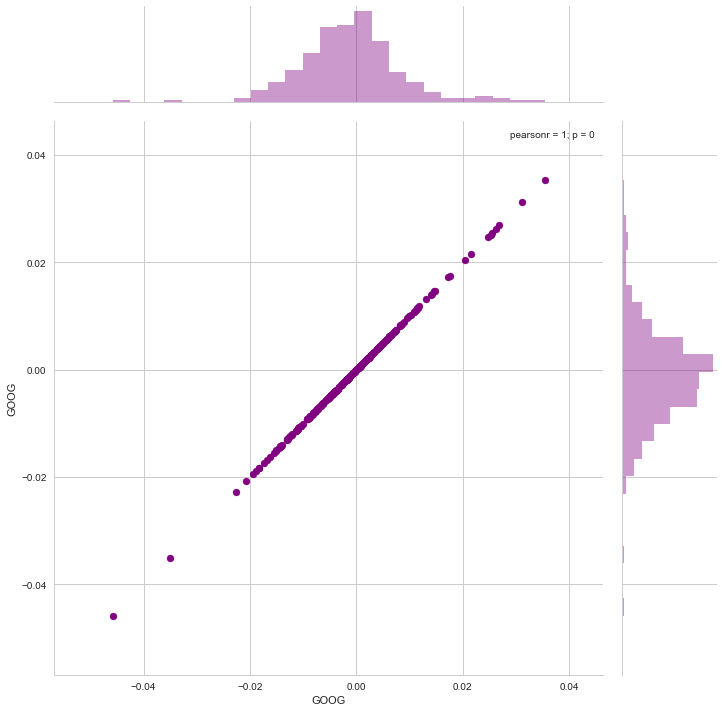

In [20]:
# Compare the daily percentage return of two stocks to check how correlated
# First GOOG with GOOGL to get perfect linear relationship

sns.jointplot('GOOG','GOOG',data=stocks_return,color='purple',size=10)

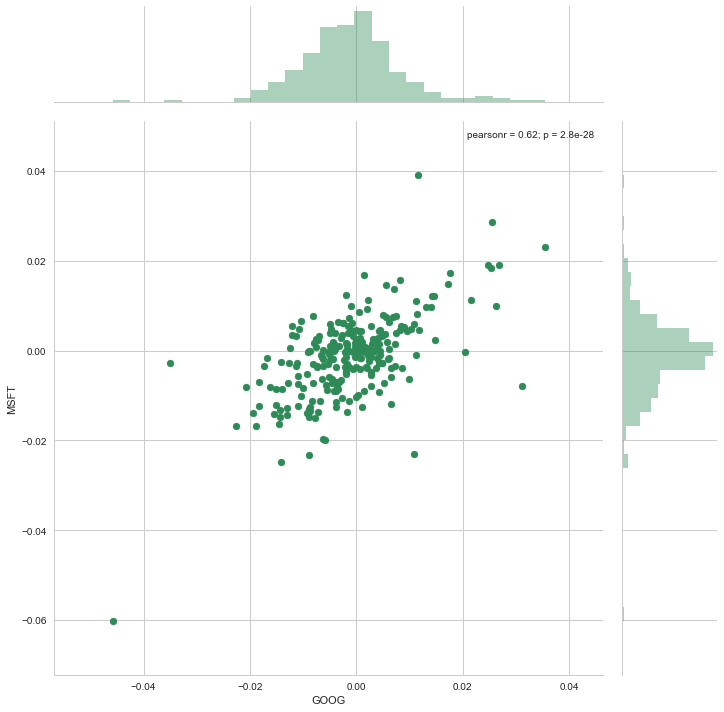

In [21]:
# Plot of GOOG with MSFT
sns.jointplot('GOOG','MSFT',data=stocks_return,color='seagreen',size=10)

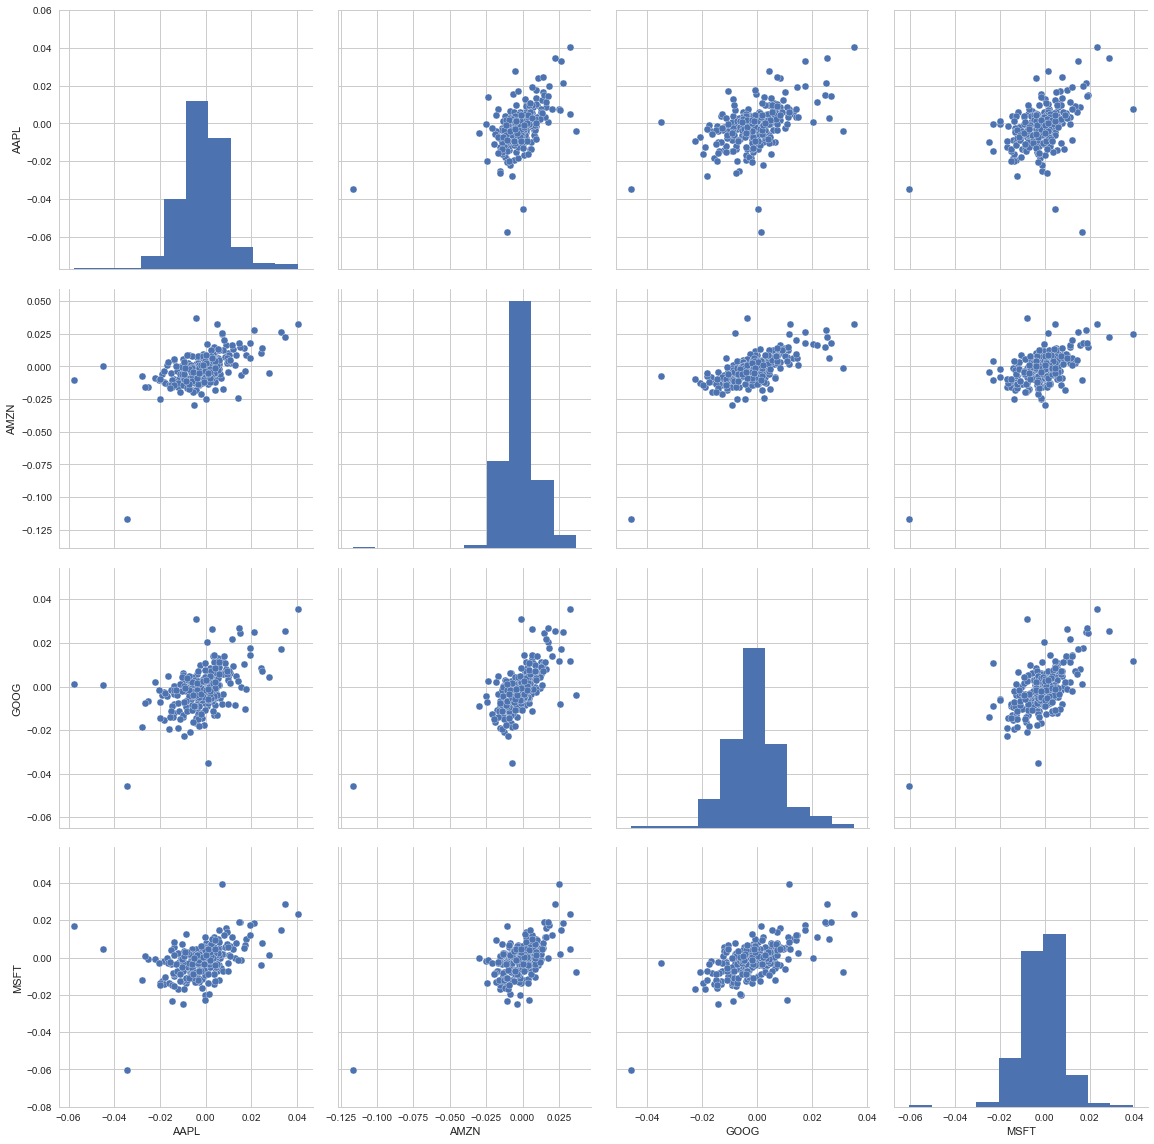

In [22]:
# Plot of correlation of all stocks with each other
sns.pairplot(stocks_return.dropna(),size=4)

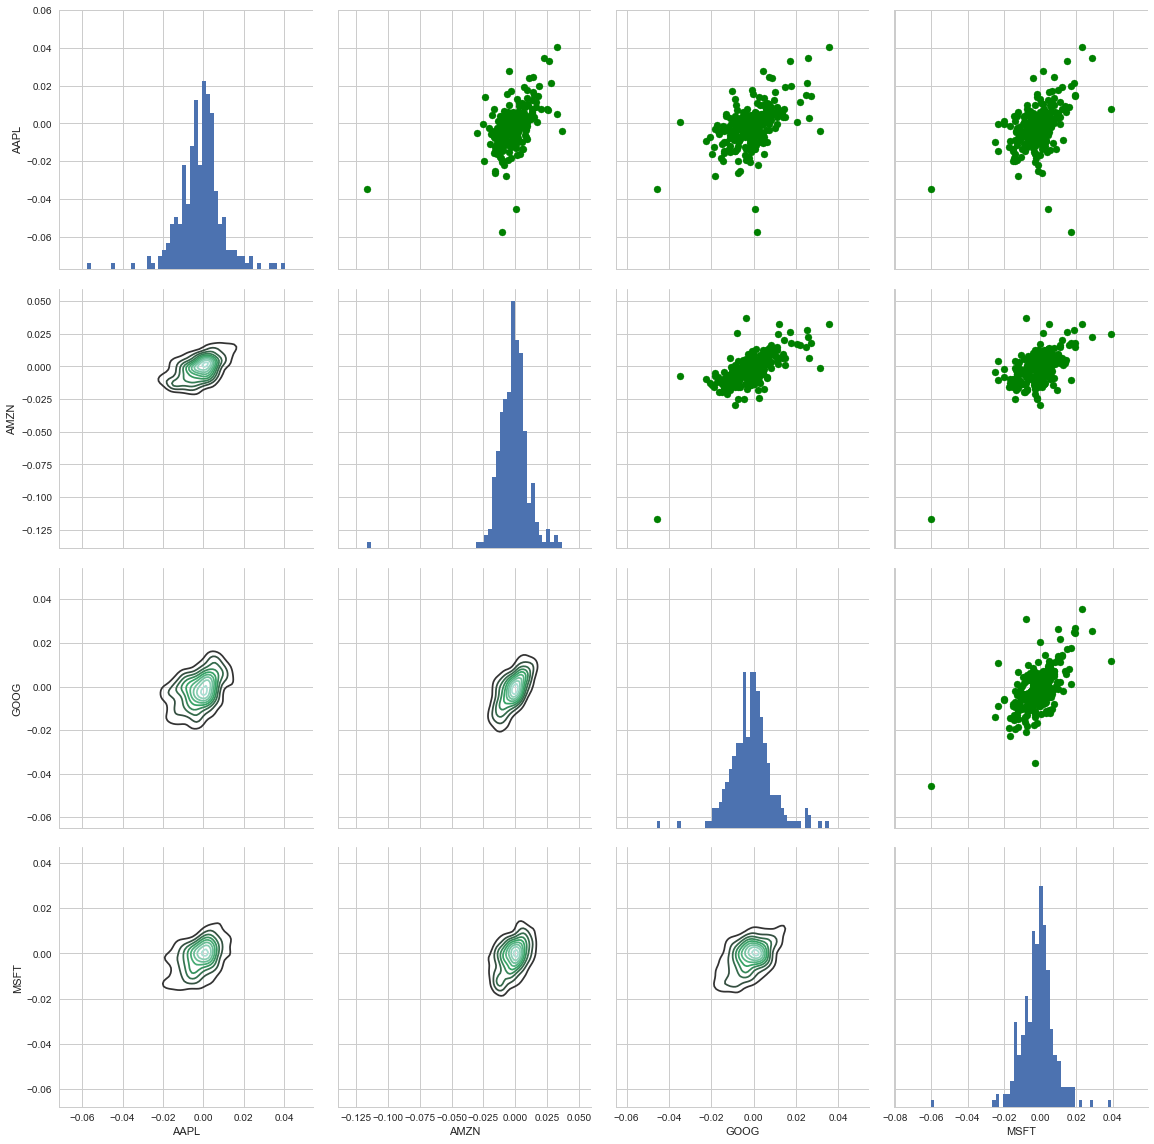

In [23]:
# More in-dept visulization
retrun_plot=sns.PairGrid(stocks_return.dropna(),size=4)

# To modify upperhalf triangle of pair plot
retrun_plot.map_upper(plt.scatter,color='green')

# To modify lowerhalf triangle of pair plot
retrun_plot.map_lower(sns.kdeplot)

# To modify diagonal of pair plot
retrun_plot.map_diag(plt.hist,bins=50)



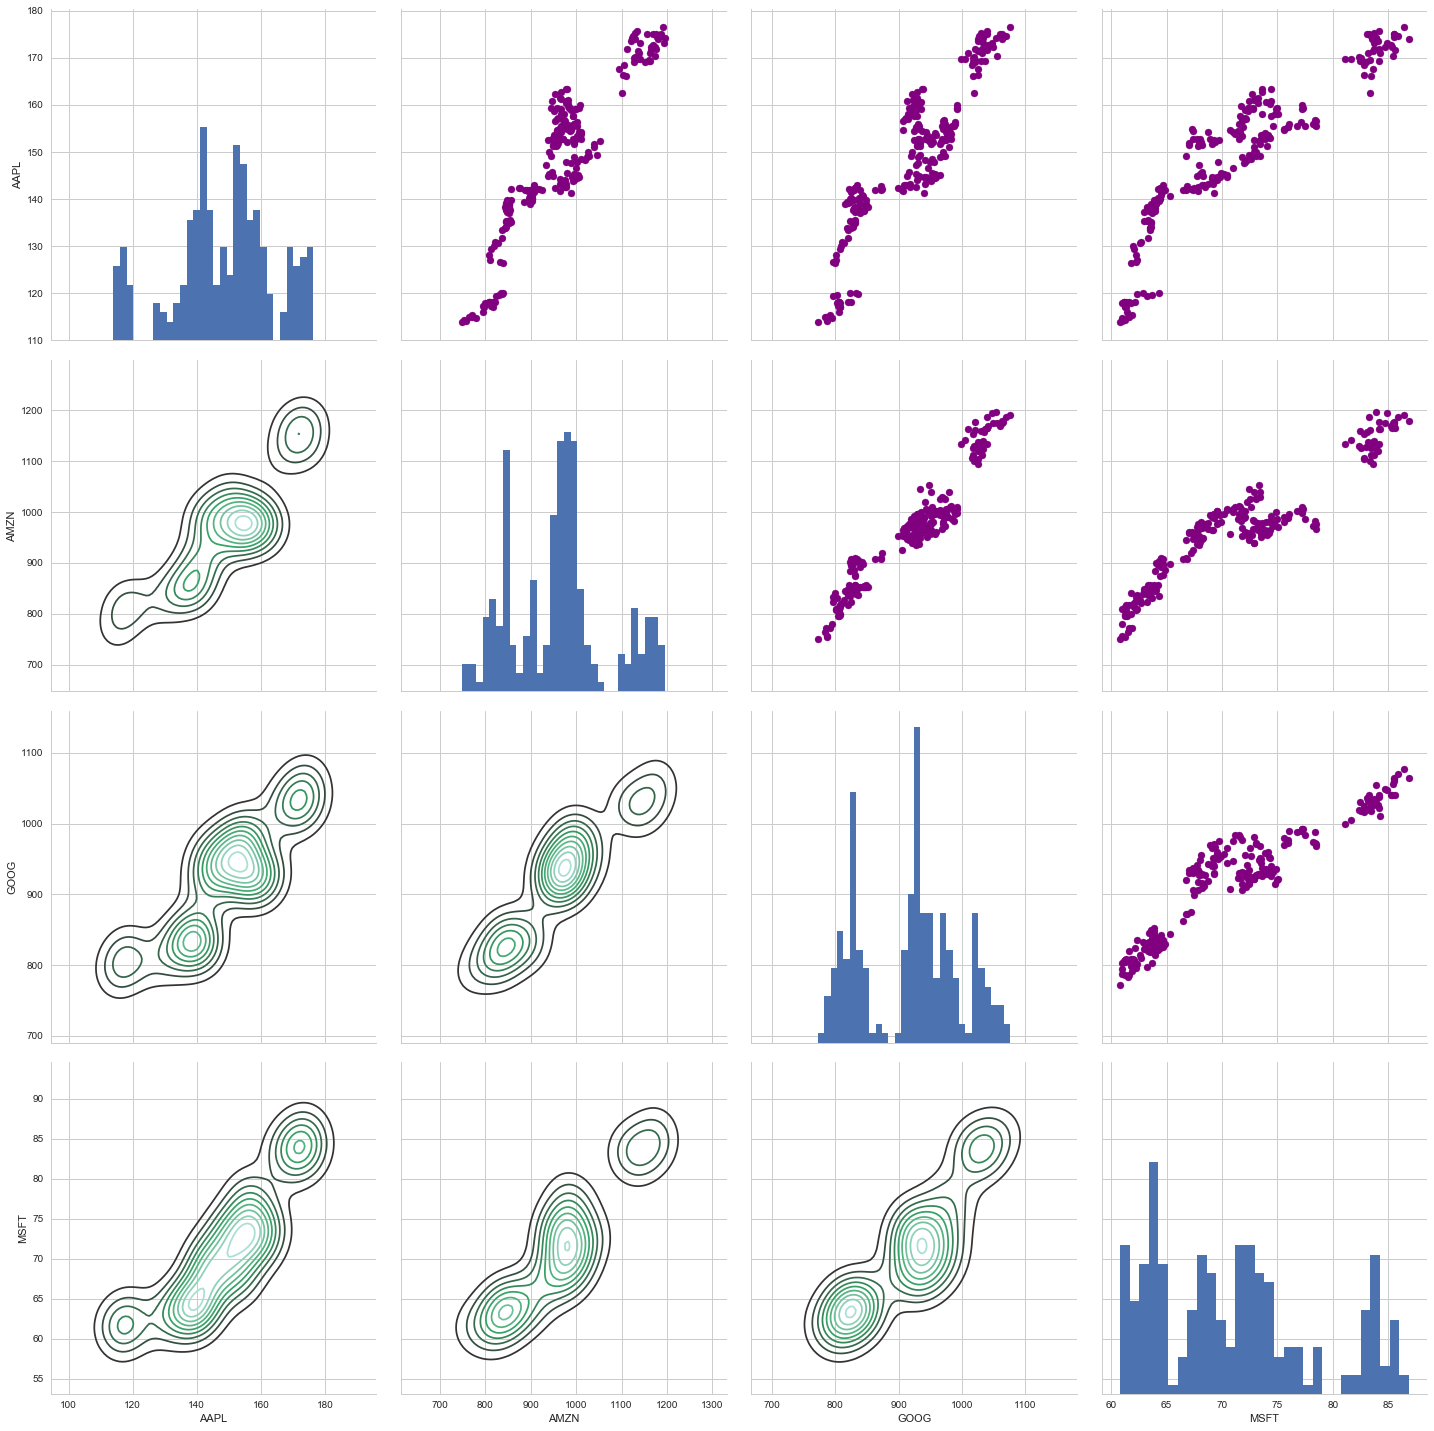

In [24]:
# Correlation of closing price

retrun_plot=sns.PairGrid(closing.dropna(),size=5)

# To modify upperhalf triangle of pair plot
retrun_plot.map_upper(plt.scatter,color='purple')

# To modify lowerhalf triangle of pair plot
retrun_plot.map_lower(sns.kdeplot)

# To modify diagonal of pair plot
retrun_plot.map_diag(plt.hist,bins=30)


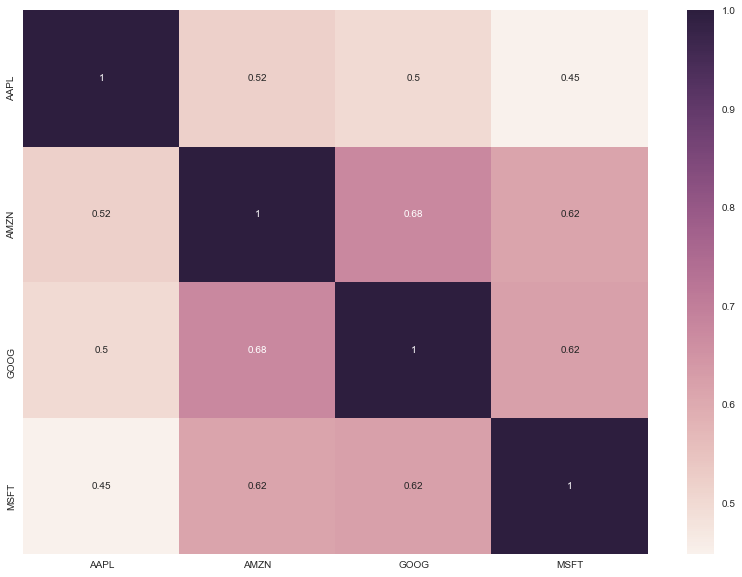

In [25]:
# Actual numerical value for correlation of all the stocks return value

sns.heatmap(stocks_return.dropna().corr(),annot=True)

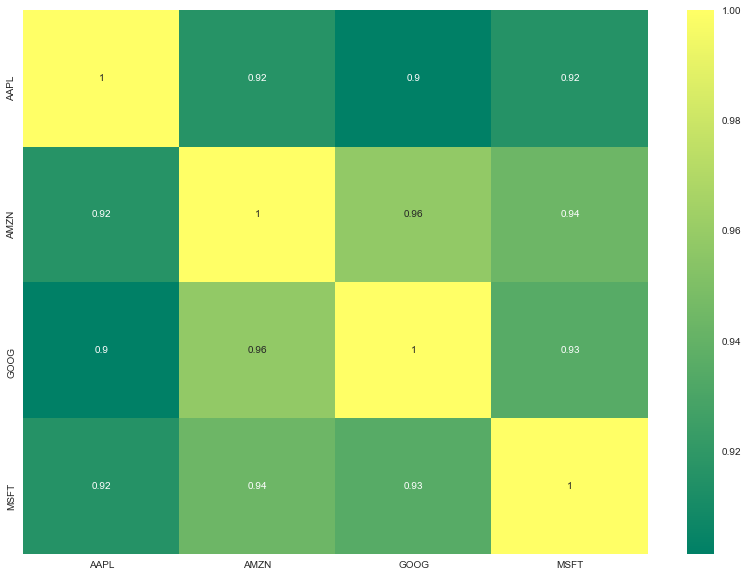

In [26]:
# Actual numerical value for correlation of all the stocks closing price

sns.heatmap(closing.dropna().corr(),annot=True,cmap='summer')

### Risk Analysis

In [27]:
rets = stocks_return.dropna()

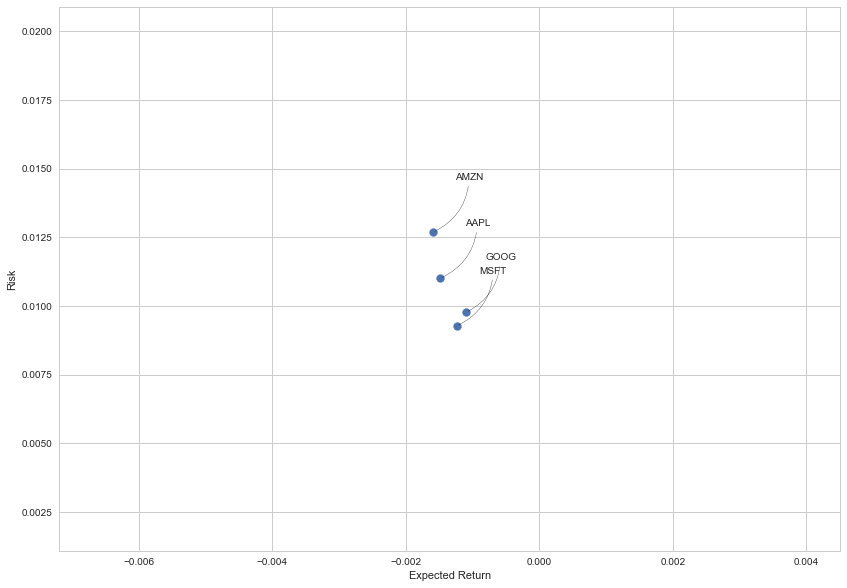

In [28]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plot
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,xy = (x, y), xytext = (50, 50),textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

### Value at Risk

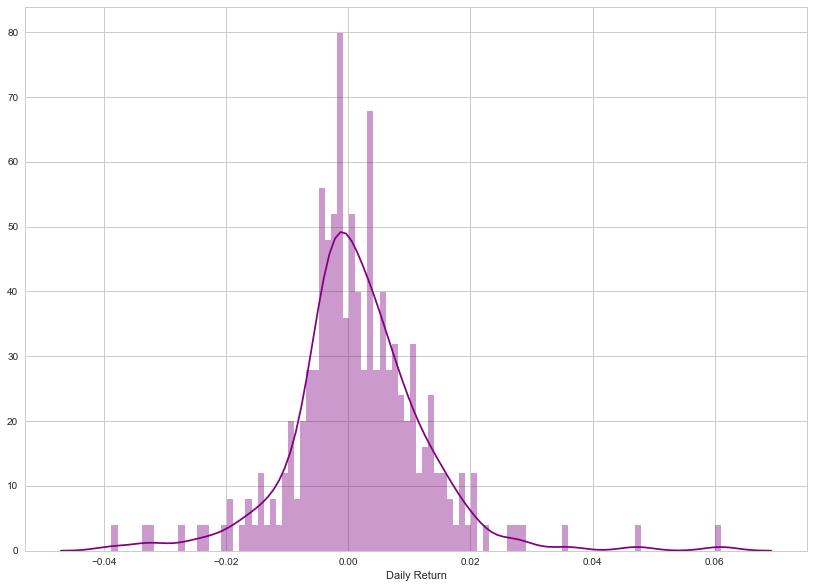

In [29]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [30]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.017923421987233124

The 0.05 empirical quantile of daily returns is at -0.017. That means that with 95% confidence, our worst daily loss will not exceed 1.5%. If we have a Rs. 1,00,000 investment, our daily loss will not excedd 0.015 * 1,00,000 = Rs. 1500 in any case.


In [31]:
# Monte Carlo method to analysis risk of Apple stock

days=365
dt=1/days
mu=rets.mean()['AAPL']
sigma=rets.std()['AAPL']

# Create a function that takes in the starting price, number of days and uses sigma and mu 

def stock_monte_carlo(start_price,days,mu,sigma):
        
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [32]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2016-12-27,116.519997,117.800003,116.489998,117.260002,115.404190,18296900,NaN,NaN,NaN,NaN
2016-12-28,117.519997,118.019997,116.199997,116.760002,114.912109,20905900,NaN,NaN,NaN,-0.004264
2016-12-29,116.449997,117.110001,116.400002,116.730003,114.882584,15039500,NaN,NaN,NaN,-0.000257
2016-12-30,116.650002,117.199997,115.430000,115.820000,113.986984,30586300,NaN,NaN,NaN,-0.007796
2017-01-03,115.800003,116.330002,114.760002,116.150002,114.311760,28781900,NaN,NaN,NaN,0.002849


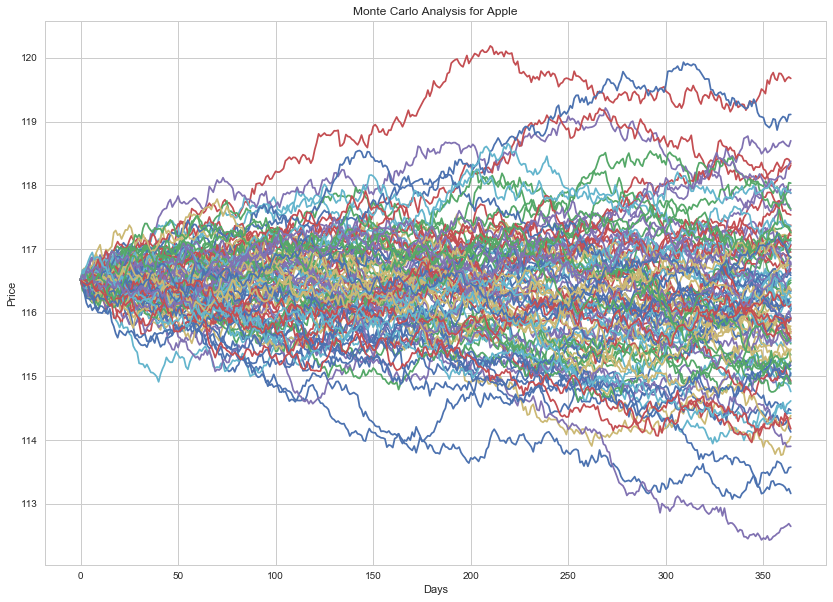

In [33]:
start_price=116.519997

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [34]:
# Histogram of the end results for a much larger run
runs = 10000

# Empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

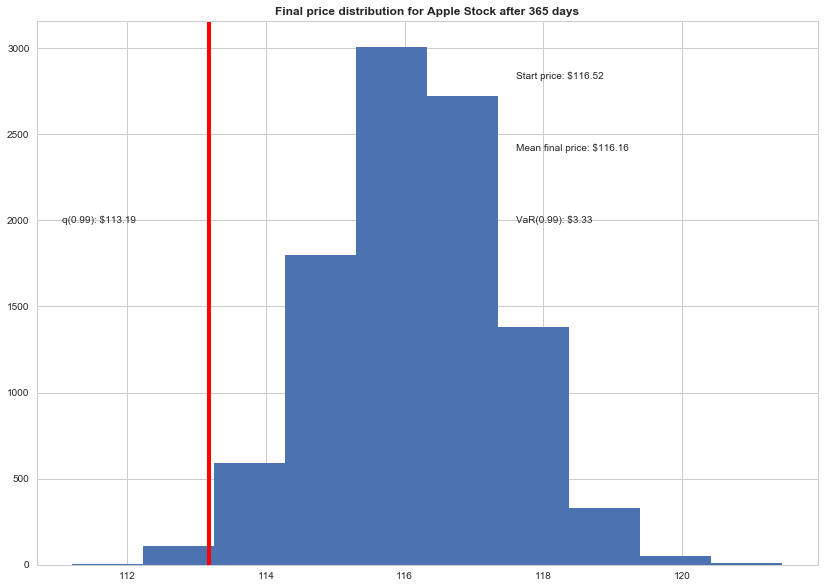

In [35]:
# Histogram
# Define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Plot the distribution of the end prices
plt.hist(simulations)

# plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');